## 9 seconds(non-overlapping)

In [2]:
import numpy as np
import wfdb as wf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
#from keras.callbacks import Tensorboard
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/9s_overlapping/train_data.npy")
trainL = np.load("/home/hsiehch/9s_overlapping/train_label.npy")
validationD = np.load("/home/hsiehch/9s_overlapping/validation_data.npy")
validationL = np.load("/home/hsiehch/9s_overlapping/validation_label.npy")
testD = np.load("/home/hsiehch/9s_overlapping/test_data.npy")
testL = np.load("/home/hsiehch/9s_overlapping/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

# with tf.device('/cpu:0'):
model = Sequential() 
model.add(Conv1D(filters = 16, kernel_size = 32, strides=2, input_shape = (trainData.shape[1], 1), activation = "relu"))   
model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
model.add(Conv1D(filters = 32, kernel_size = 5, strides=2, activation = "relu"))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
    
print(model.summary())


# parallel_model = multi_gpu_model(model, gpus=2)
model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 50
train_history_1 = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=80,
                          validation_data=(validationData, validationLabel),
                          batch_size=batch_s*1, 
                          verbose=1)
evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
del model

print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


Train Data: (28250, 2700, 1)
Train Label:  (28250, 4)
Vali Data:  (11301, 2700, 1)
Vali Label:  (11301, 4)
Test Data:  (16944, 2700, 1)
Test Label:  (16944, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1335, 16)          528       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 652, 32)           16416     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 311, 32)           32800     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 140, 32)           32800     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 55, 32)            32800     
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 12, 32)     

KeyboardInterrupt: 

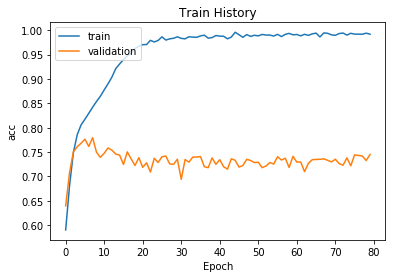

In [2]:
show_plot('acc', train_history_1)

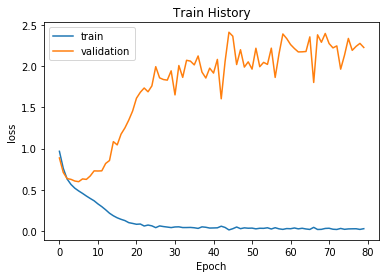

In [3]:
show_plot('loss', train_history_1)

## 9 seconds(overlapping)

In [ ]:
import numpy as np
import wfdb as wf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils
np.set_printoptions(suppress=True)

import data_preprocessing as dp
tmp = dp.makeData(9, 0.5, 0.2, 0.3, overlap_dot=1350)
trainD, trainL, v_D, v_L, testD, testL = tmp.main()

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)


model = Sequential() 
model.add(Conv1D(filters = 512, kernel_size = 3, input_shape = (trainData.shape[1], 1), activation = "relu"))
model.add(MaxPooling1D(pool_size = 100))
model.add(Flatten())
model.add(Dense(4, activation = "softmax"))
print(model.summary())

model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
train_history = model.fit(x = trainData, y = trainLabel, epochs=10, validation_split=0.2, batch_size=100, verbose=2)

print('Finish training!')


import pylab as plt

def history_display(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag):
    if flag == 'acc':
        history_display(train_history, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(train_history, 'loss', 'val_loss')
    else:
        print('Invalid!')
     

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A: 5003
~: 1356
O: 16983
N: 33153
split train data index:  [[0, 2502, 3503, 5003], [5003, 5682, 5954, 6359], [6359, 14851, 18248, 23342], [23342, 39919, 46550, 56495]]
(28250, 2700)
(28250,)
(11301, 2700)
(11301,)
(16944, 2700)
(16944,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2698, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 26, 512)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 53252     
Total params: 55,300
Trainable params: 55,300
Non-trainable params: 0
_________________________________________________________________
None
Train on 22600 samples, vali

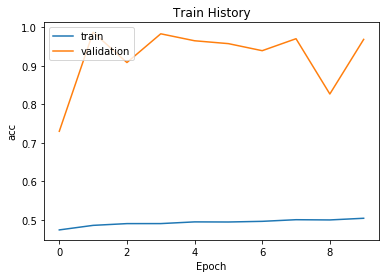

In [2]:
show_plot('acc')

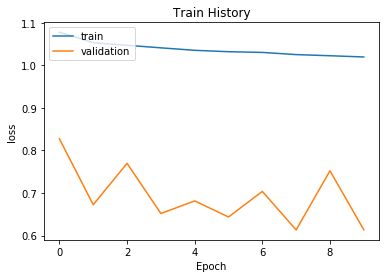

In [3]:
show_plot('loss')

## 30 seconds

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)


try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential() 
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1), activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

print(model.summary())


# parallel_model = multi_gpu_model(model, gpus=2)
model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
# batch_s = 50
# graph = TensorBoard()
early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=80,
                          validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                          batch_size=100, 
                          verbose=1)
# model.save('model_30s.h5')

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2245, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2239, 64)          14400     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1119, 

Epoch 30/80
5078/5078 [==============================] - 4s 786us/step - loss: 0.4372 - acc: 0.8377 - val_loss: 0.5056 - val_acc: 0.8100
Epoch 31/80
5078/5078 [==============================] - 4s 811us/step - loss: 0.4360 - acc: 0.8310 - val_loss: 0.5109 - val_acc: 0.7992
Epoch 32/80
5078/5078 [==============================] - 4s 829us/step - loss: 0.4279 - acc: 0.8395 - val_loss: 0.5431 - val_acc: 0.8027
Epoch 33/80
5078/5078 [==============================] - 4s 791us/step - loss: 0.4250 - acc: 0.8444 - val_loss: 0.5085 - val_acc: 0.8125
Epoch 34/80
5078/5078 [==============================] - 4s 784us/step - loss: 0.4314 - acc: 0.8399 - val_loss: 0.5456 - val_acc: 0.8071
Epoch 35/80
5078/5078 [==============================] - 4s 803us/step - loss: 0.4246 - acc: 0.8391 - val_loss: 0.5327 - val_acc: 0.8056
Epoch 36/80
5078/5078 [==============================] - 4s 831us/step - loss: 0.4073 - acc: 0.8503 - val_loss: 0.5354 - val_acc: 0.8012
Epoch 37/80
5078/5078 [==================

In [3]:
import pandas as pd

test_prediction = model.predict_classes(testData, batch_size=1)
pd.crosstab(testL, test_prediction, rownames=['Label'], colnames=['prediction'])

prediction,0,1,2,3
Label,,,,
0,196,1,8,65
1,4,45,20,20
2,10,2,1644,131
3,66,8,210,611


In [4]:
model.save('1D_model_30s_early_stopping.h5')

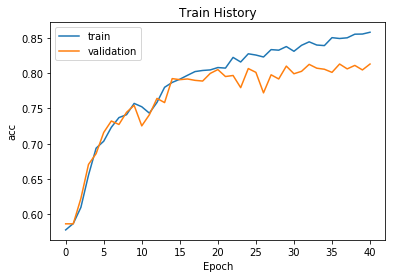

In [5]:
show_plot('acc', train_history_1)

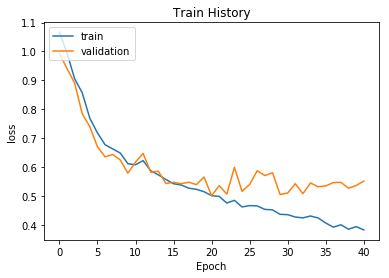

In [6]:
show_plot('loss', train_history_1)

## 30s k-fold

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import Activation
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)
trainD = np.append(trainD, testD, axis=0)
trainL = np.append(trainL, testL, axis=0)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (10151, 9000, 1)
Train Label:  (10151, 4)


In [2]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
print(kf)

training_data = []
training_label = []
validation_cate_label = []
validation_data = []
validation_label = []

for train_index, test_index in kf.split(trainData):
    print('trian:', train_index, 'len', len(train_index), 'test:', test_index, 'len', len(test_index))
    training_data.append(trainData[train_index])
    training_label.append(trainLabel[train_index])
    validation_data.append(trainData[test_index])
    validation_label.append(trainLabel[test_index])
    validation_cate_label.append(trainL[test_index])

training_data = np.array(training_data)
training_label = np.array(training_label)
validation_data = np.array(validation_data)
validation_label = np.array(validation_label)
validation_cate_label = np.array(validation_cate_label)


KFold(n_splits=5, random_state=None, shuffle=True)
trian: [    0     1     3 ... 10148 10149 10150] len 8120 test: [    2    17    21 ... 10121 10127 10144] len 2031
trian: [    0     1     2 ... 10148 10149 10150] len 8121 test: [    3    10    13 ... 10124 10125 10139] len 2030
trian: [    0     1     2 ... 10147 10148 10149] len 8121 test: [    7     9    12 ... 10145 10146 10150] len 2030
trian: [    1     2     3 ... 10146 10148 10150] len 8121 test: [    0     4     6 ... 10143 10147 10149] len 2030
trian: [    0     2     3 ... 10147 10149 10150] len 8121 test: [    1     5    11 ... 10136 10141 10148] len 2030


In [3]:
from sklearn.metrics import f1_score
import pandas as pd

def model_structure():
    model = Sequential() 
    model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1), activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 32, kernel_size = 7, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 7, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
    model.add(Flatten())
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))

    print('Model finished!')
    
    return model

F1_result = []

for X_train, Y_train, X_val, Y_val, val_cat in zip(training_data, training_label, validation_data, validation_label, validation_cate_label):
        
    model = model_structure()
    model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
    early_stop = EarlyStopping(patience=20)
    train_history_1 = model.fit(x = X_train, 
                                y = Y_train,
                                epochs=80,
                                validation_data=(X_val, Y_val),
                                callbacks=[early_stop],
                                batch_size=100, 
                                verbose=1)
    evaluation = model.evaluate(x = X_val, y = Y_val)
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
    
    validation_prediction = model.predict_classes(X_val, batch_size=100)
    result = f1_score(val_cat, validation_prediction, average=None)
    F1_result.append(result)
    del model


print('Finish training!')

Model finished!
Train on 8120 samples, validate on 2031 samples
Epoch 1/80
8120/8120 [==============================] - 9s 1ms/step - loss: 1.0150 - acc: 0.5692 - val_loss: 0.8731 - val_acc: 0.5943
Epoch 2/80
8120/8120 [==============================] - 6s 742us/step - loss: 0.9103 - acc: 0.6014 - val_loss: 0.8349 - val_acc: 0.6489
Epoch 3/80
8120/8120 [==============================] - 6s 732us/step - loss: 0.8186 - acc: 0.6671 - val_loss: 0.7810 - val_acc: 0.6873
Epoch 4/80
8120/8120 [==============================] - 6s 742us/step - loss: 0.7260 - acc: 0.7028 - val_loss: 0.6957 - val_acc: 0.7120
Epoch 5/80
8120/8120 [==============================] - 6s 762us/step - loss: 0.6783 - acc: 0.7195 - val_loss: 0.6008 - val_acc: 0.7533
Epoch 6/80
8120/8120 [==============================] - 6s 763us/step - loss: 0.6640 - acc: 0.7261 - val_loss: 0.5910 - val_acc: 0.7587
Epoch 7/80
8120/8120 [==============================] - 6s 765us/step - loss: 0.6247 - acc: 0.7438 - val_loss: 0.5628 - va

8120/8120 [==============================] - 6s 745us/step - loss: 0.3416 - acc: 0.8752 - val_loss: 0.4402 - val_acc: 0.8548
Epoch 61/80
8120/8120 [==============================] - 6s 747us/step - loss: 0.3417 - acc: 0.8734 - val_loss: 0.4578 - val_acc: 0.8518
Epoch 62/80
8120/8120 [==============================] - 6s 744us/step - loss: 0.3323 - acc: 0.8775 - val_loss: 0.4662 - val_acc: 0.8488
Epoch 63/80
8120/8120 [==============================] - 6s 734us/step - loss: 0.3318 - acc: 0.8805 - val_loss: 0.4688 - val_acc: 0.8523
Epoch 64/80
8120/8120 [==============================] - 6s 737us/step - loss: 0.3194 - acc: 0.8781 - val_loss: 0.4549 - val_acc: 0.8498
Epoch 65/80
8120/8120 [==============================] - 6s 731us/step - loss: 0.3260 - acc: 0.8815 - val_loss: 0.4602 - val_acc: 0.8538
Epoch 66/80
8120/8120 [==============================] - 6s 752us/step - loss: 0.3204 - acc: 0.8787 - val_loss: 0.4488 - val_acc: 0.8493
Epoch 67/80
8120/8120 [==============================

Epoch 50/80
8121/8121 [==============================] - 6s 771us/step - loss: 0.3566 - acc: 0.8697 - val_loss: 0.4630 - val_acc: 0.8369
Epoch 51/80
8121/8121 [==============================] - 6s 739us/step - loss: 0.3503 - acc: 0.8711 - val_loss: 0.4637 - val_acc: 0.8300
Epoch 52/80
8121/8121 [==============================] - 6s 737us/step - loss: 0.3490 - acc: 0.8727 - val_loss: 0.4691 - val_acc: 0.8340
Epoch 53/80
8121/8121 [==============================] - 6s 777us/step - loss: 0.3533 - acc: 0.8713 - val_loss: 0.4730 - val_acc: 0.8271
Epoch 54/80
8121/8121 [==============================] - 6s 743us/step - loss: 0.3592 - acc: 0.8700 - val_loss: 0.4781 - val_acc: 0.8345
Epoch 55/80
2030/2030 [==============================] - 1s 257us/step
Loss: 0.467, Accuracy: 0.824
Model finished!
Train on 8121 samples, validate on 2030 samples
Epoch 1/80
8121/8121 [==============================] - 7s 875us/step - loss: 1.0558 - acc: 0.5712 - val_loss: 1.0151 - val_acc: 0.5798
Epoch 2/80
8121

8121/8121 [==============================] - 6s 746us/step - loss: 0.7264 - acc: 0.7051 - val_loss: 0.6693 - val_acc: 0.7384
Epoch 5/80
8121/8121 [==============================] - 6s 744us/step - loss: 0.6716 - acc: 0.7266 - val_loss: 0.6326 - val_acc: 0.7527
Epoch 6/80
8121/8121 [==============================] - 6s 735us/step - loss: 0.6343 - acc: 0.7438 - val_loss: 0.6473 - val_acc: 0.7493
Epoch 7/80
8121/8121 [==============================] - 6s 775us/step - loss: 0.6349 - acc: 0.7498 - val_loss: 0.6334 - val_acc: 0.7527
Epoch 8/80
8121/8121 [==============================] - 6s 745us/step - loss: 0.6030 - acc: 0.7588 - val_loss: 0.5819 - val_acc: 0.7764
Epoch 9/80
8121/8121 [==============================] - 6s 780us/step - loss: 0.5956 - acc: 0.7685 - val_loss: 0.5910 - val_acc: 0.7626
Epoch 10/80
8121/8121 [==============================] - 6s 743us/step - loss: 0.5811 - acc: 0.7716 - val_loss: 0.5829 - val_acc: 0.7714
Epoch 11/80
8121/8121 [==============================] - 6

Epoch 64/80
8121/8121 [==============================] - 6s 758us/step - loss: 0.3185 - acc: 0.8820 - val_loss: 0.4835 - val_acc: 0.8345
Epoch 65/80
8121/8121 [==============================] - 6s 753us/step - loss: 0.3392 - acc: 0.8686 - val_loss: 0.4694 - val_acc: 0.8365
Epoch 66/80
8121/8121 [==============================] - 6s 737us/step - loss: 0.3140 - acc: 0.8810 - val_loss: 0.4888 - val_acc: 0.8404
Epoch 67/80
8121/8121 [==============================] - 6s 740us/step - loss: 0.3234 - acc: 0.8810 - val_loss: 0.4955 - val_acc: 0.8365
Epoch 68/80
8121/8121 [==============================] - 6s 737us/step - loss: 0.3177 - acc: 0.8824 - val_loss: 0.4876 - val_acc: 0.8438
Epoch 69/80
8121/8121 [==============================] - 6s 740us/step - loss: 0.3084 - acc: 0.8829 - val_loss: 0.4909 - val_acc: 0.8379
Epoch 70/80
8121/8121 [==============================] - 6s 741us/step - loss: 0.3066 - acc: 0.8870 - val_loss: 0.4893 - val_acc: 0.8300
Epoch 71/80
8121/8121 [==================

Epoch 51/80
8121/8121 [==============================] - 6s 761us/step - loss: 0.3569 - acc: 0.8675 - val_loss: 0.4464 - val_acc: 0.8488
Epoch 52/80
8121/8121 [==============================] - 6s 740us/step - loss: 0.3725 - acc: 0.8581 - val_loss: 0.4743 - val_acc: 0.8438
Epoch 53/80
8121/8121 [==============================] - 6s 739us/step - loss: 0.3644 - acc: 0.8629 - val_loss: 0.4443 - val_acc: 0.8557
Epoch 54/80
8121/8121 [==============================] - 6s 735us/step - loss: 0.3599 - acc: 0.8690 - val_loss: 0.4195 - val_acc: 0.8640
Epoch 55/80
8121/8121 [==============================] - 6s 748us/step - loss: 0.3548 - acc: 0.8661 - val_loss: 0.4402 - val_acc: 0.8488
Epoch 56/80
8121/8121 [==============================] - 6s 752us/step - loss: 0.3475 - acc: 0.8691 - val_loss: 0.4279 - val_acc: 0.8552
Epoch 57/80
8121/8121 [==============================] - 6s 742us/step - loss: 0.3486 - acc: 0.8671 - val_loss: 0.4414 - val_acc: 0.8478
Epoch 58/80
8121/8121 [==================

In [5]:
print(F1_result)

[array([0.80653951, 0.72413793, 0.91091493, 0.7525299 ]), array([0.71134021, 0.69230769, 0.89750919, 0.71546203]), array([0.69295775, 0.62068966, 0.89452496, 0.68959108]), array([0.78181818, 0.51724138, 0.90533981, 0.7530648 ]), array([0.80108992, 0.52427184, 0.91609242, 0.76758682])]


In [7]:
tmp = [0,0,0,0]
for i in F1_result:
    tmp += i

tmp /= 5
print("<avg>")
print("AF: {}".format(tmp[0]))
print("Noise: {}".format(tmp[1]))
print("Normal: {}".format(tmp[2]))
print("Other: {}".format(tmp[3]))

# AF Noise Normal Other

<avg>
AF: 0.7587491124551075
Noise: 0.6157297004970255
Normal: 0.9048762601406286
Other: 0.7356469255184189


## Check Tensorflow & Keras

In [9]:
import tensorflow as tf
tf.__version__

'1.4.0'

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.3'